In [55]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image, display


In [3]:
csv_path = os.path.join(*["data", "raw", "train_info_dirty.csv"])
df = pd.read_csv(csv_path, header=None, names=["file", "class"])

## Which classes we have?

In [33]:
classes_data = pd.read_csv("data/class_list.txt", sep=" ", header=None)
classes_data.columns = ["code", "label"]

In [34]:
classes_data

,code,label
0,0,macaron
1,1,beignet
2,2,cruller
3,3,cockle_food
4,4,samosa
...,...,...
246,246,chicken_cordon_bleu
247,247,eccles_cake
248,248,moo_goo_gai_pan
249,249,buffalo_wing


## How many images per class?

In [4]:
df_temp = df.groupby("class").count()
df_temp.columns = ["occurrences"]
bins = np.array([0, 100, 200, 300, 400, 500, 600])
bins_idx = np.digitize(df_temp["occurrences"], bins)
df_temp["bins"] = bins_idx

In [5]:
df_temp["bins"].unique()

array([6, 5, 4, 7, 2])

In [11]:
bin_labels = {
    1: "[0, 100)",
    2: "[100, 200)",
    3: "[200, 300)",
    4: "[300, 400)",
    5: "[400, 500)",
    6: "[500, 600)",
    7: "[600, 700)"
}

In [12]:
df_temp["label"] = df_temp["bins"].apply(lambda x: bin_labels.get(x))

In [21]:
df_temp.groupby("label").count()

,occurrences,bins
label,,
"[100, 200)",1,1
"[300, 400)",35,35
"[400, 500)",123,123
"[500, 600)",90,90
"[600, 700)",2,2


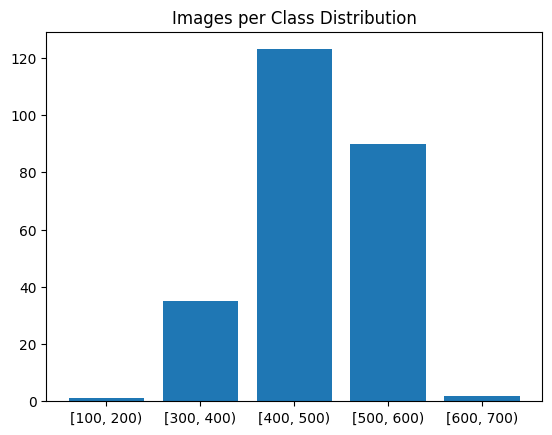

In [22]:
data = df_temp.groupby("label").count()
plt.bar(x=data.index, height=data.occurrences.values)
plt.title("Images per Class Distribution")
plt.show()

## Show images for a given class

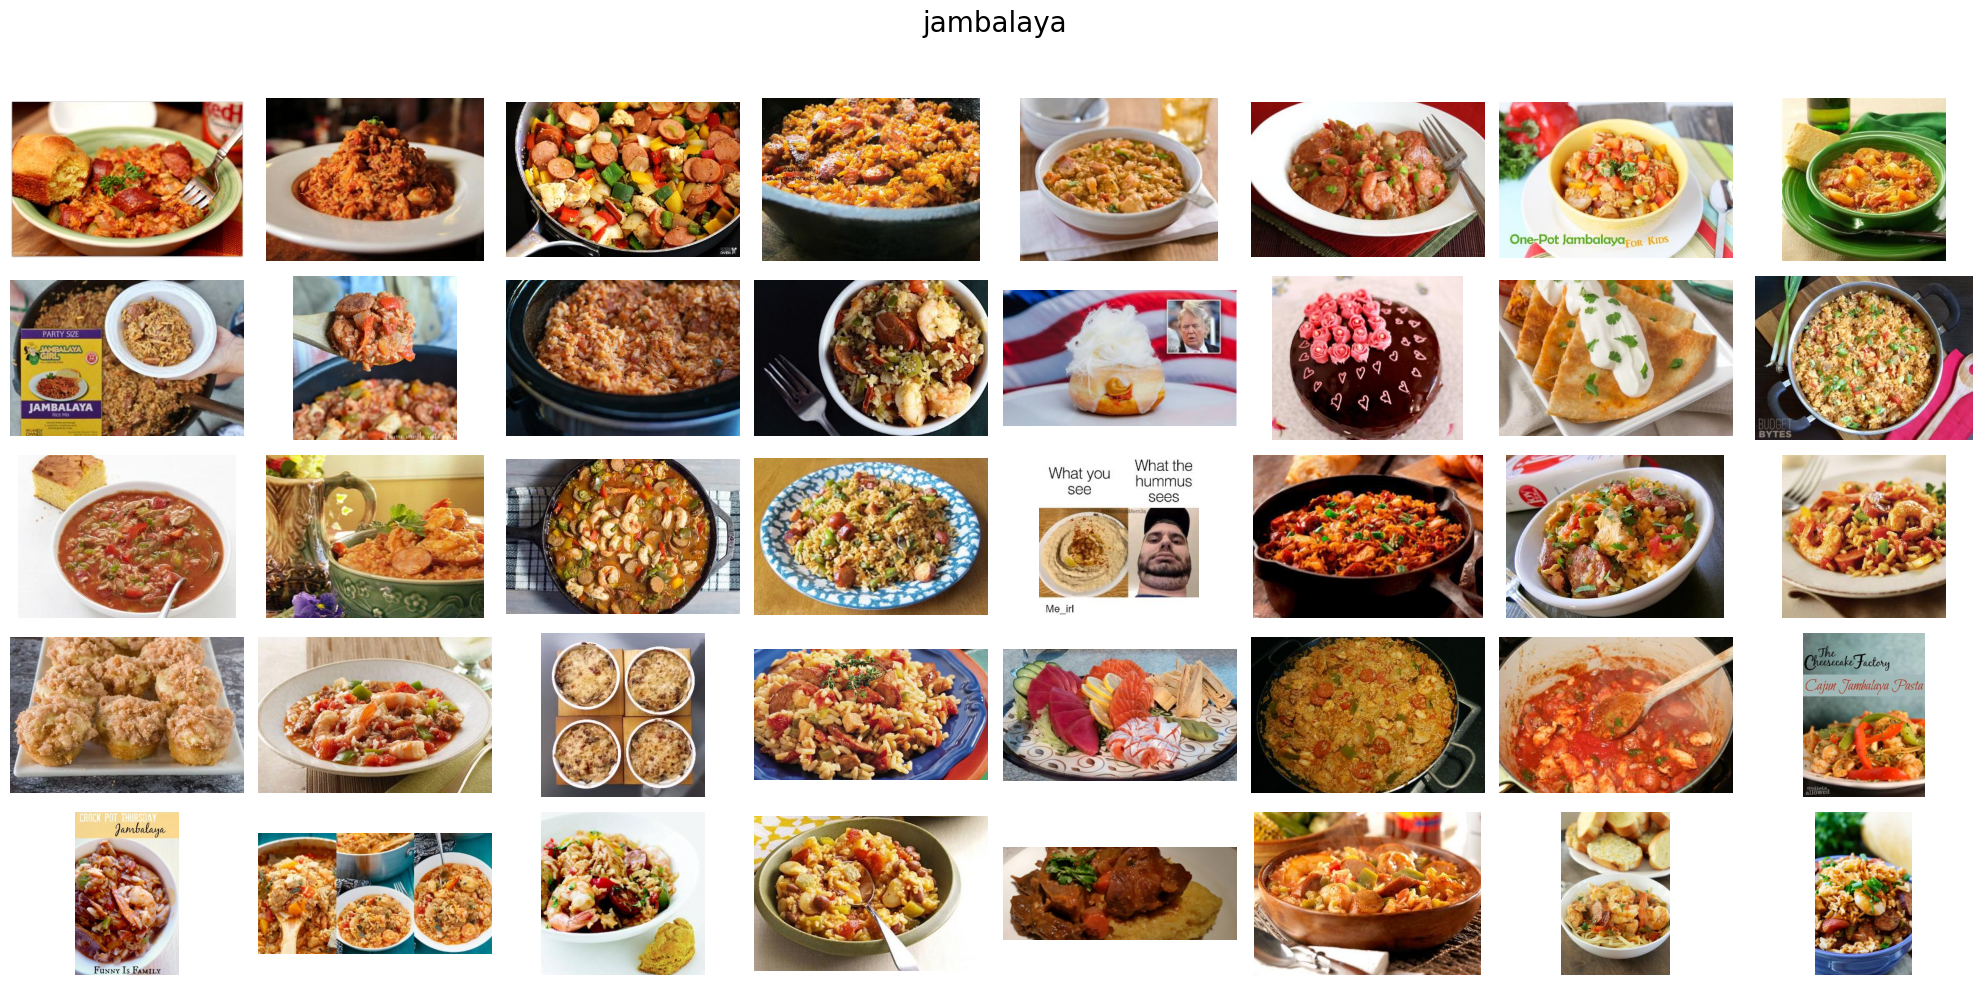

In [63]:
sample = classes_data.sample()

# Directory containing your images
image_dir =  os.path.join(*["data", "clean", "train", str(sample.code.item())])

# Get a list of the image filenames
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Select the first 40 images
image_files = image_files[:40]

# Create a grid
rows, cols = 5, 8  # 5 rows and 8 columns for 40 images
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

# Plot images
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(image_dir, image_files[i])
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.suptitle(sample.label.item().replace("_", " "), fontsize=20)
plt.subplots_adjust(top=0.85)
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.savefig("grid_example.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()